In [1]:
from IPython.core.display import display

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', size = 14)

In [2]:
from Sznajd1DModel import Sznajd1DModel, vote_result

import mesa.batchrunner as mb

# Single run

In [3]:
# each run has num_steps steps
max_steps = 300

# there is one agent at each node
# so we only need to know the size of the grid
width = 1000

In [4]:
# create a model
model = Sznajd1DModel(width)

# execute num_steps steps
for _ in range(max_steps):
    model.step()

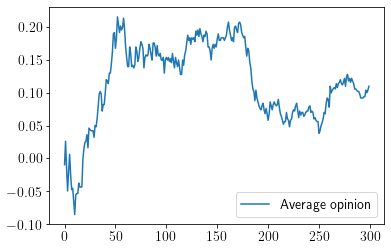

In [5]:
avg_vote_result = model.datacollector.get_model_vars_dataframe()
avg_vote_result.plot()

# Batch run

In [6]:
variable_params = { "width" : range(100,500,100)}
fixed_params = { }

batch_run = mb.BatchRunner(
        Sznajd1DModel,
        variable_params,
        fixed_params,
        iterations=20,
        max_steps=20,
        model_reporters={"Average opinion": vote_result}
        )

In [7]:
batch_run.run_all()

80it [00:04, 18.20it/s]


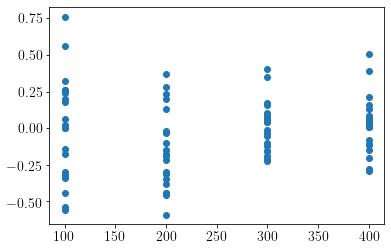

In [8]:
run_data = batch_run.get_model_vars_dataframe()
plt.scatter(run_data.width, run_data.aggregate('Average opinion'))